In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
path1 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/Experiment/211117_od58_11161900xfp_tom4,15,60/05'
path2 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/Experiment/211117_od58_11161900xfp_tom4,15,60/08'
path3 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/Experiment/211117_od58_11161000xfp_tom4,15,60/04'
path_n2 = '/Users/blandt/Desktop/Data/Rundowns/PAR-2 RUNDOWN/N2/211117_n2_wt_tom4,15,60/10'

img1 = load_image(path1 + '/af_corrected.tif')
img2 = load_image(path2 + '/af_corrected.tif')
img3 = load_image(path3 + '/af_corrected.tif')
img_n2 = load_image(path_n2 + '/af_corrected.tif')

roi1 = np.loadtxt(path1 + '/ROI.txt')
roi2 = np.loadtxt(path2 + '/ROI.txt')
roi3 = np.loadtxt(path3 + '/ROI.txt')
roi_n2 = np.loadtxt(path_n2 + '/ROI.txt')

In [3]:
n = 10
noises = np.repeat(np.linspace(0, 5000, 11), n)

### Images

<IPython.core.display.Javascript object>


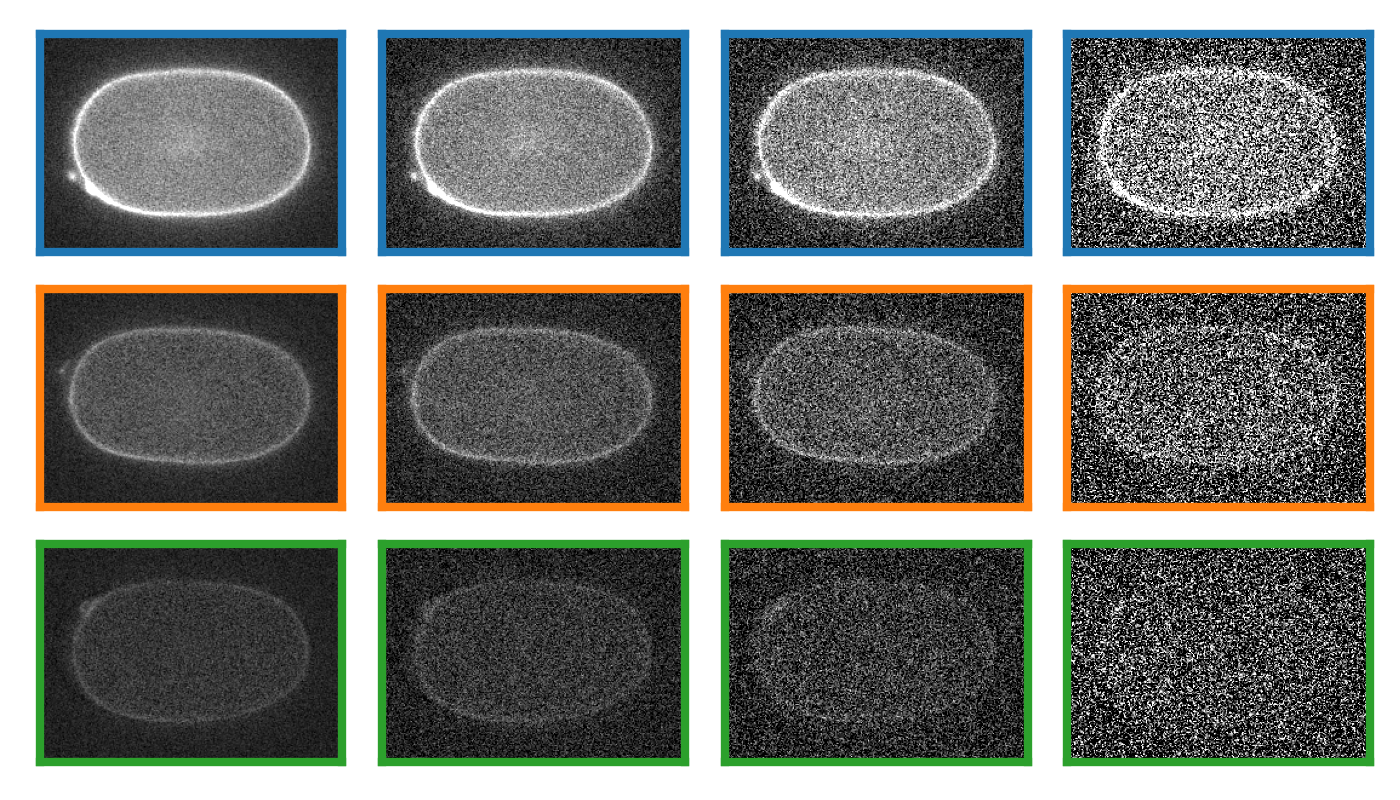

In [15]:
def func(img, roi, noise, ax, c):
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    noisy_rotated = rotated + np.random.normal(0, noise, rotated.shape)    
    ax.imshow(noisy_rotated, cmap='gray', vmin=-1000, vmax=8000, origin='lower')
    ax.set_xticks([])
    ax.set_yticks([])
        
    [spine.set_edgecolor(c) for spine in ax.spines.values()]
    [spine.set_linewidth(3) for spine in ax.spines.values()]

    
fig, ax = plt.subplots(3, 4)
func(img1, roi1, 0.00, ax[0][0], 'tab:blue')
func(img1, roi1, 1000, ax[0][1], 'tab:blue')
func(img1, roi1, 2000, ax[0][2], 'tab:blue')
func(img1, roi1, 5000, ax[0][3], 'tab:blue')

func(img2, roi2, 0.00, ax[1][0], 'tab:orange')
func(img2, roi2, 1000, ax[1][1], 'tab:orange')
func(img2, roi2, 2000, ax[1][2], 'tab:orange')
func(img2, roi2, 5000, ax[1][3], 'tab:orange')

func(img3, roi3, 0.00, ax[2][0], 'tab:green')
func(img3, roi3, 1000, ax[2][1], 'tab:green')
func(img3, roi3, 2000, ax[2][2], 'tab:green')
func(img3, roi3, 5000, ax[2][3], 'tab:green')

fig.set_size_inches(7, 4)
fig.tight_layout()
fig.savefig('Figs/images.png', dpi=600, transparent=True)

### Membrane and cytoplasmic concentrations

In [5]:
res1 = pd.read_csv('res1.csv')
res2 = pd.read_csv('res2.csv')
res3 = pd.read_csv('res3.csv')
res_n2 = pd.read_csv('res_n2.csv')

mems1 = res1.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Membrane signal'], [0, 1]))
cyts1 = res1.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Cytoplasmic signal'], [0, 1])) 

mems2 = res2.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Membrane signal'], [0, 1]))
cyts2 = res2.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Cytoplasmic signal'], [0, 1])) 

mems3 = res3.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Membrane signal'], [0, 1]))
cyts3 = res3.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Cytoplasmic signal'], [0, 1])) 

mems_n2 = res_n2.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Membrane signal'], [0, 1]))
cyts_n2 = res_n2.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Cytoplasmic signal'], [0, 1]))

<IPython.core.display.Javascript object>


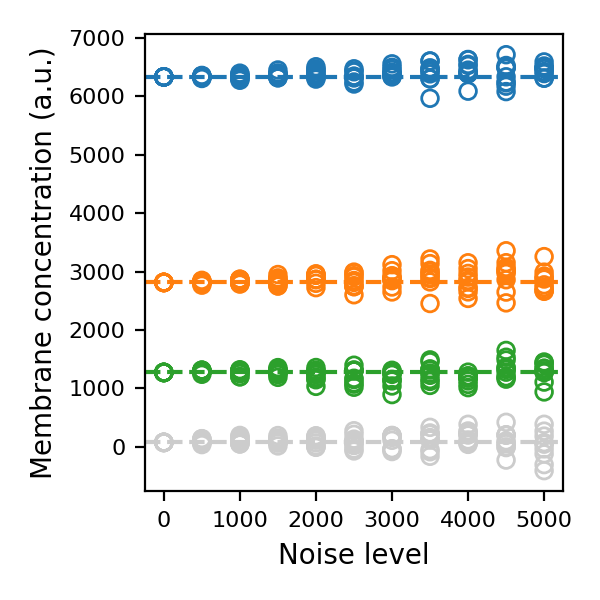

In [6]:
fig, ax = plt.subplots()
ax.scatter(noises, mems1, facecolors='none', edgecolors='tab:blue')
ax.scatter(noises, mems2, facecolors='none', edgecolors='tab:orange')
ax.scatter(noises, mems3, facecolors='none', edgecolors='tab:green')
ax.scatter(noises, mems_n2, facecolors='none', edgecolors='0.8')

ax.axhline(mems1[0], c='tab:blue', linestyle='--')
ax.axhline(mems2[0], c='tab:orange', linestyle='--')
ax.axhline(mems3[0], c='tab:green', linestyle='--')
ax.axhline(mems_n2[0], c='0.8', linestyle='--')

ax.set_xlabel('Noise level')
ax.set_ylabel('Membrane concentration (a.u.)')
ax.tick_params(axis='both', labelsize=8)
# ax.set_ylim(bottom=0)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/membrane.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


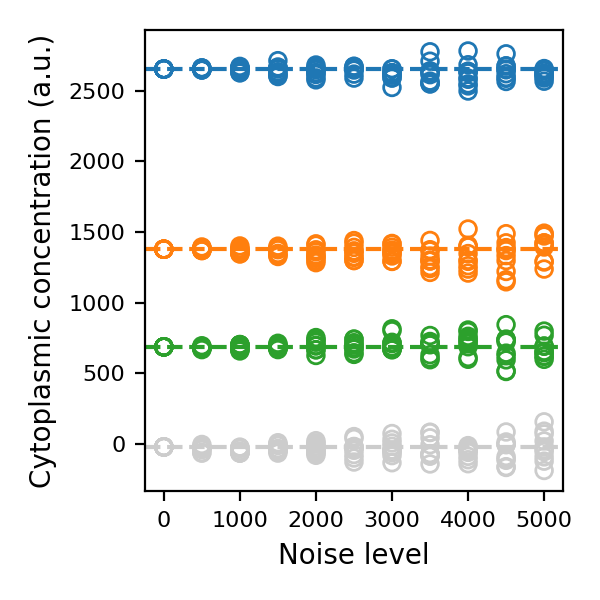

In [7]:
fig, ax = plt.subplots()
ax.scatter(noises, cyts1, facecolors='none', edgecolors='tab:blue')
ax.scatter(noises, cyts2, facecolors='none', edgecolors='tab:orange')
ax.scatter(noises, cyts3, facecolors='none', edgecolors='tab:green')
ax.scatter(noises, cyts_n2, facecolors='none', edgecolors='0.8')

ax.axhline(cyts1[0], c='tab:blue', linestyle='--')
ax.axhline(cyts2[0], c='tab:orange', linestyle='--')
ax.axhline(cyts3[0], c='tab:green', linestyle='--')
ax.axhline(cyts_n2[0], c='0.8', linestyle='--')

ax.set_xlabel('Noise level')
ax.set_ylabel('Cytoplasmic concentration (a.u.)')
ax.tick_params(axis='both', labelsize=8)
# ax.set_ylim(bottom=0)
fig.set_size_inches(3, 3)
fig.tight_layout()
fig.savefig('Figs/cytoplasm.png', dpi=600, transparent=True)

### Segmentation

In [8]:
rois1 = [np.loadtxt(p) for p in sorted(glob.glob('Segmentations/iq1/*.txt'))]
rois2 = [np.loadtxt(p) for p in sorted(glob.glob('Segmentations/iq2/*.txt'))]
rois3 = [np.loadtxt(p) for p in sorted(glob.glob('Segmentations/iq3/*.txt'))]
rois_n2 = [np.loadtxt(p) for p in sorted(glob.glob('Segmentations/iq_n2/*.txt'))]

<IPython.core.display.Javascript object>


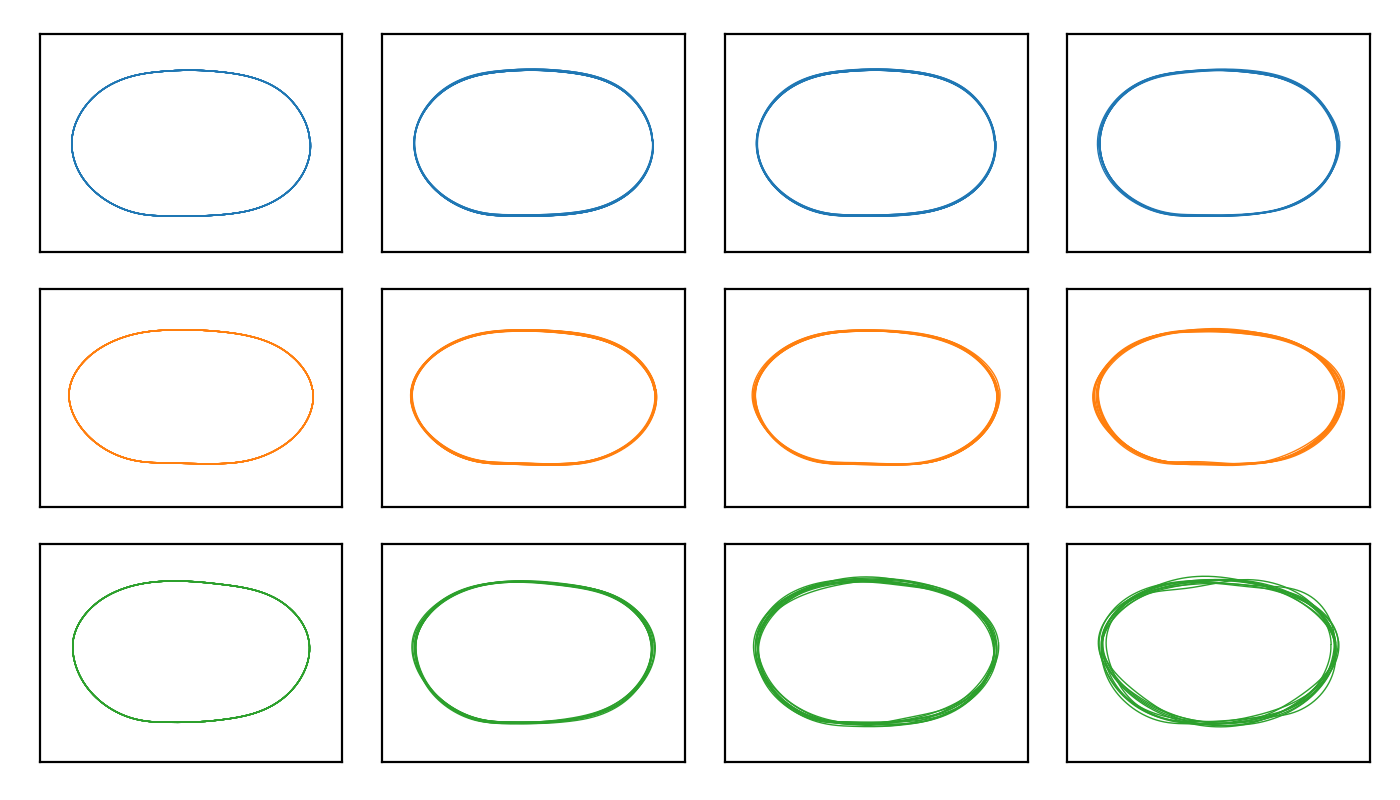

In [9]:
noise_levels = [0, 1000, 2000, 5000]

# Calculte coefficients
_, coeff1 = np.linalg.eig(np.cov(rois1[0].T))
_, coeff2 = np.linalg.eig(np.cov(rois2[0].T))
_, coeff3 = np.linalg.eig(np.cov(rois3[0].T))

def transform_coor_grid(roi, coeff, l, h):
    roi_transformed = np.dot(coeff.T, roi.T)
    x_range = (min(roi_transformed[0, :]) - max(roi_transformed[0, :]))
    y_range = (min(roi_transformed[1, :]) - max(roi_transformed[1, :]))
    
    # Force long axis orientation
    if x_range > y_range:
        roi_transformed = np.flipud(roi_transformed)
    
    # Centre
    centre_x = (min(roi_transformed[0, :]) + max(roi_transformed[0, :])) / 2
    centre_y = (min(roi_transformed[1, :]) + max(roi_transformed[1, :])) // 2
    roi_transformed = roi_transformed - np.expand_dims([centre_x - (l / 2), centre_y - (h / 2)], -1)
    
    # Force posterior on right
    if roi_transformed[0, 0] < roi_transformed[0, roi_transformed.shape[1] // 2]:
        roi_transformed[0, :] = l - roi_transformed[0, :]
        
    return roi_transformed.T

        

def func(ax, rois, coeff, noise_level, c):
    _rois = [r for r, n in zip(rois, noises) if n == noise_level]
    _rois_transformed = [transform_coor_grid(r, coeff, 250, 180) for r in _rois]
    [ax.plot(r[:, 0], r[:, 1], c=c, linewidth=0.5) for r in _rois_transformed]
    
    r0 = transform_coor_grid(rois[0], coeff, 250, 180)
#     ax.plot(r0[:, 0], r0[:, 1], c='k', linestyle='--', zorder=0, linewidth=0.5)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 250)
    ax.set_ylim(0, 180)
    ax.set_aspect('equal')

fig, ax = plt.subplots(3, 4)
func(ax[0][0], rois1, coeff1, noise_levels[0], c='tab:blue')
func(ax[0][1], rois1, coeff1, noise_levels[1], c='tab:blue')
func(ax[0][2], rois1, coeff1, noise_levels[2], c='tab:blue')
func(ax[0][3], rois1, coeff1, noise_levels[3], c='tab:blue')

func(ax[1][0], rois2, coeff2, noise_levels[0], c='tab:orange')
func(ax[1][1], rois2, coeff2, noise_levels[1], c='tab:orange')
func(ax[1][2], rois2, coeff2, noise_levels[2], c='tab:orange')
func(ax[1][3], rois2, coeff2, noise_levels[3], c='tab:orange')

func(ax[2][0], rois3, coeff3, noise_levels[0], c='tab:green')
func(ax[2][1], rois3, coeff3, noise_levels[1], c='tab:green')
func(ax[2][2], rois3, coeff3, noise_levels[2], c='tab:green')
func(ax[2][3], rois3, coeff3, noise_levels[3], c='tab:green')

fig.set_size_inches(7, 4)
fig.tight_layout()
fig.savefig('Figs/segmentation.png', dpi=600, transparent=True)